In [4]:
import pandas as pd
import numpy as np
import io
import dvc.api
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

import warnings; warnings.simplefilter('ignore')

In [1]:
# pip install dvc[all]


In [2]:
# !git clone https://github.com/isaaclucky/sales-prediction.git ./sales_prediction


In [3]:
# cd sales_prediction/

In [4]:
# !dvc pull 


In [6]:
df_train = pd.read_csv('data/df_train_prep.csv')
df_test = pd.read_csv('data/df_test_prep.csv')

In [7]:
df_train = df_train[df_train.Open==1]
df_train.drop(columns=['Open'],inplace=True)
df_test = df_test[df_test.Open==1]
df_test.drop(columns=['Open'],inplace=True)

In [8]:
df_train.index.name = None


In [9]:
df_train.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [10]:
df_train = df_train.set_index('Date')
df_train = df_train.iloc[::-1]
df_train.index.name = None


In [11]:
df_train

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Quarter,Week,Day,WeekOfYear,DayOfYear,IsWeekDay,CompetitionOpenMonthDuration,PromoOpenMonthDuration,Season,Month_Status
2013-01-01,1097,2,5961,1405,0,a,1,b,b,720.0,...,1,1,1,1,1,1,130.0,24156.25,Winter,Beginning
2013-01-01,948,2,4491,1039,0,a,1,b,b,1430.0,...,1,1,1,1,1,1,1356.0,24156.25,Winter,Beginning
2013-01-01,769,2,5035,1248,0,a,1,b,b,840.0,...,1,1,1,1,1,1,1356.0,0.25,Winter,Beginning
2013-01-01,733,2,10765,2377,0,a,1,b,b,860.0,...,1,1,1,1,1,1,159.0,24156.25,Winter,Beginning
2013-01-01,682,2,3375,566,0,a,1,b,a,150.0,...,1,1,1,1,1,1,76.0,24156.25,Winter,Beginning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-31,5,5,4822,559,1,0,1,a,a,29910.0,...,3,31,31,31,212,1,3.0,24187.75,Summer,End
2015-07-31,4,5,13995,1498,1,0,1,c,c,620.0,...,3,31,31,31,212,1,70.0,24187.75,Summer,End
2015-07-31,3,5,8314,821,1,0,1,a,a,14130.0,...,3,31,31,31,212,1,103.0,52.25,Summer,End
2015-07-31,2,5,6064,625,1,0,1,a,a,570.0,...,3,31,31,31,212,1,92.0,64.50,Summer,End


In [12]:
df_train.loc['2013-01-01':'2014-01-01']

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Quarter,Week,Day,WeekOfYear,DayOfYear,IsWeekDay,CompetitionOpenMonthDuration,PromoOpenMonthDuration,Season,Month_Status
2013-01-01,1097,2,5961,1405,0,a,1,b,b,720.0,...,1,1,1,1,1,1,130.0,24156.25,Winter,Beginning
2013-01-01,948,2,4491,1039,0,a,1,b,b,1430.0,...,1,1,1,1,1,1,1356.0,24156.25,Winter,Beginning
2013-01-01,769,2,5035,1248,0,a,1,b,b,840.0,...,1,1,1,1,1,1,1356.0,0.25,Winter,Beginning
2013-01-01,733,2,10765,2377,0,a,1,b,b,860.0,...,1,1,1,1,1,1,159.0,24156.25,Winter,Beginning
2013-01-01,682,2,3375,566,0,a,1,b,a,150.0,...,1,1,1,1,1,1,76.0,24156.25,Winter,Beginning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,335,3,3007,600,0,a,1,b,a,90.0,...,1,1,1,1,1,1,1368.0,4.50,Winter,Beginning
2014-01-01,274,3,3616,769,0,a,1,b,b,3640.0,...,1,1,1,1,1,1,1368.0,9.75,Winter,Beginning
2014-01-01,262,3,19637,3159,0,a,1,b,a,1180.0,...,1,1,1,1,1,1,8.0,24168.25,Winter,Beginning
2014-01-01,259,3,9630,1753,0,a,1,b,b,210.0,...,1,1,1,1,1,1,1368.0,24168.25,Winter,Beginning


In [13]:
store = df_train.groupby('Store')['Sales'].mean()

In [14]:
store.shape

(1115,)

In [15]:
df_store = pd.DataFrame(data = df_train.Store.unique(),columns=['Store'])
df_store['Sales'] = store

In [ ]:
df_store

,Store,Sales
0,1097,NaN
1,948,4759.096031
2,769,4953.900510
3,733,6942.568678
4,682,9638.401786
...,...,...
1110,1,4531.910600
1111,762,5251.702182
1112,349,10236.577664
1113,1081,6627.859694


In [ ]:
# df_store.set_index('Date')

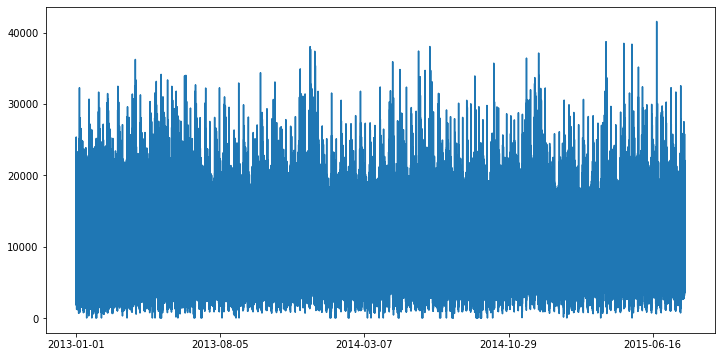

In [ ]:
df_train['Sales'].plot(figsize=(12,6))

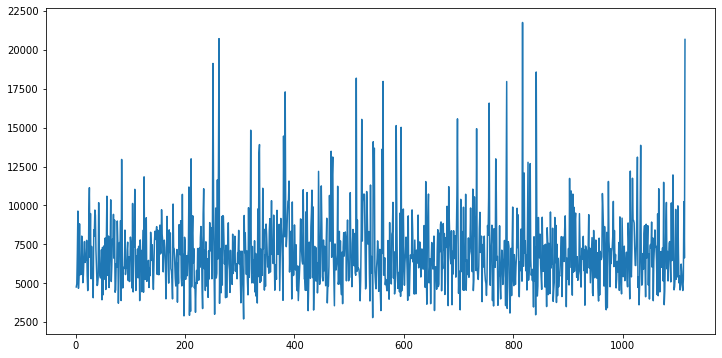

In [ ]:
df_store['Sales'].plot(figsize=(12,6))

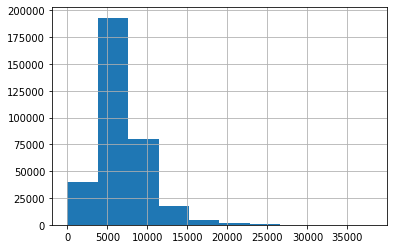

In [ ]:
df_train.loc['2013-01-01':'2014-01-01']['Sales'].hist();
plt.show();

## Autocorrelation and Correlation Plot

In [17]:
df_train_2013 = df_train.loc['2013-01-01':'2014-01-01'].copy(deep=True)

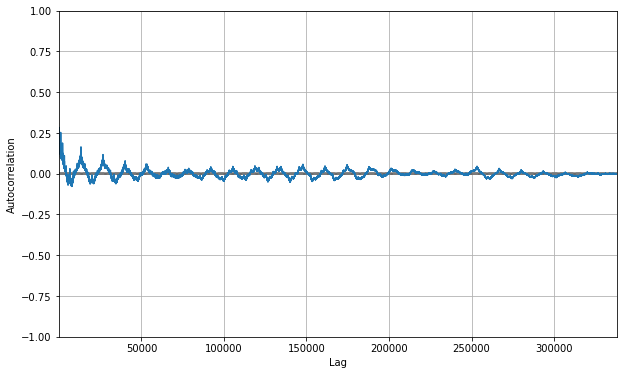

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(df_train.loc['2013-01-01':'2014-01-01']['Sales']);

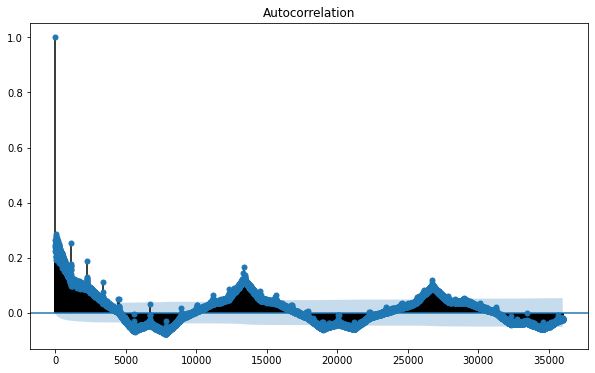

In [ ]:
import statsmodels.api as sm
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(df_train.loc['2013-01-01':'2014-01-01']['Sales'], lags = 36000);

## Before Removing Trend

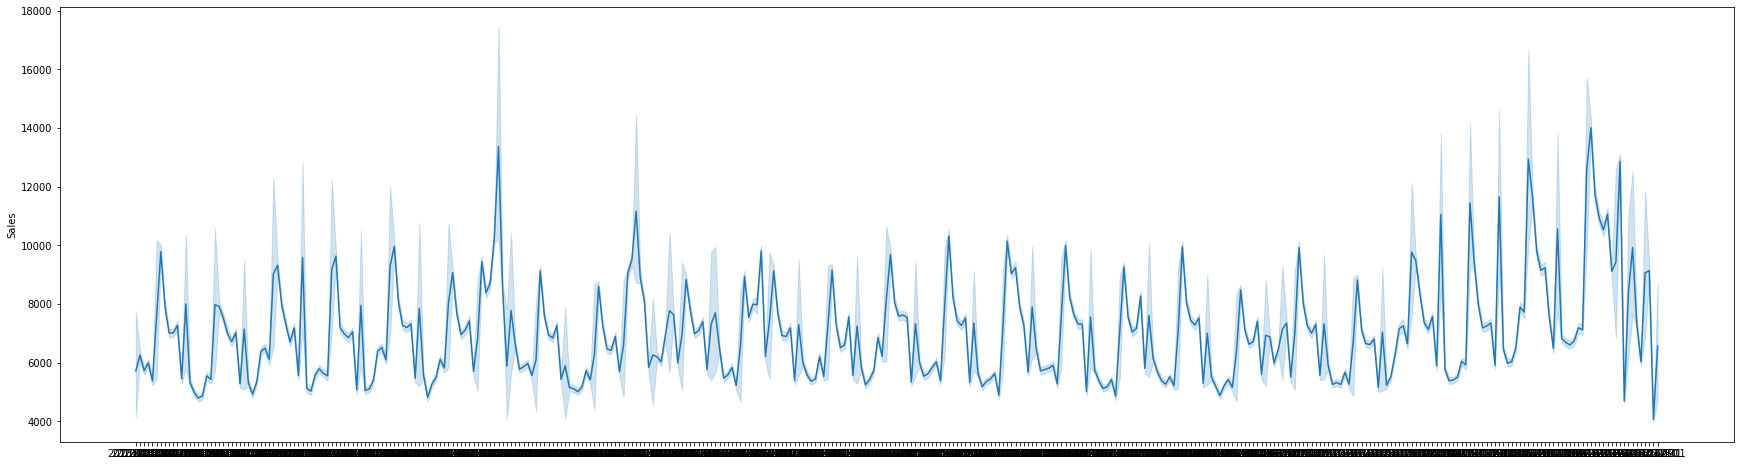

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(data=df_train_2013['Sales'], palette="deep");

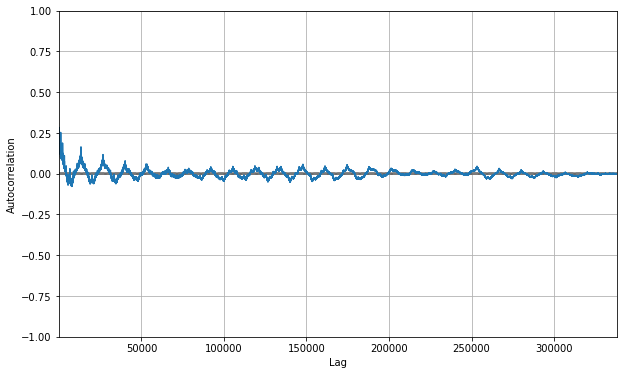

In [29]:
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(df_train_2013['Sales']);

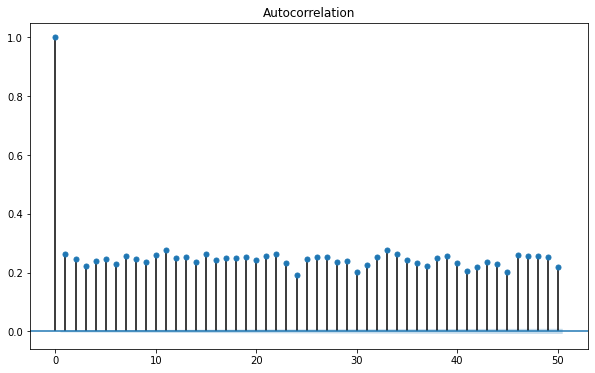

In [30]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(df_train_2013['Sales'], lags=50);

## After Removing Trend

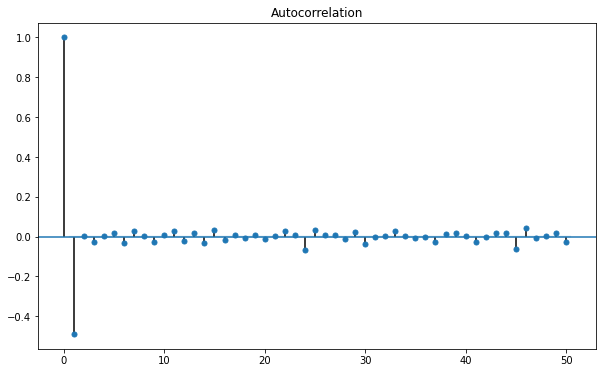

In [61]:
data = df_train_2013['Sales'] - df_train_2013['Sales'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(data[1:], lags=50);

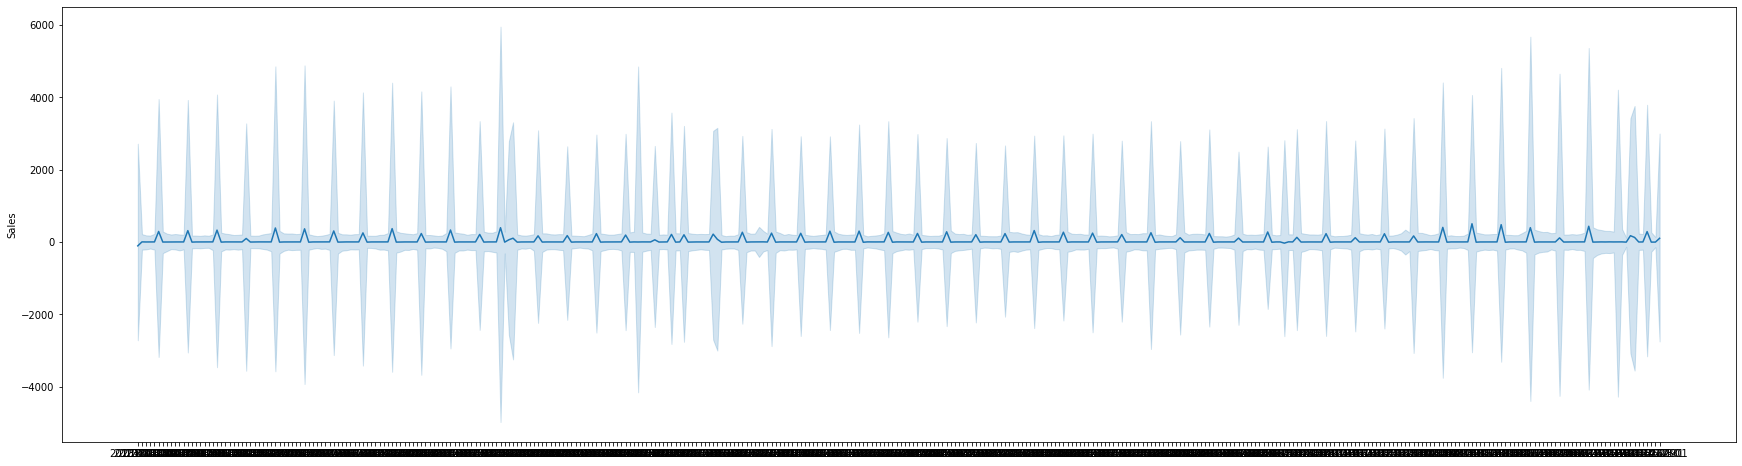

In [32]:
plt.figure(figsize=(30,8))
sns.lineplot(data=data[1:], palette="deep");

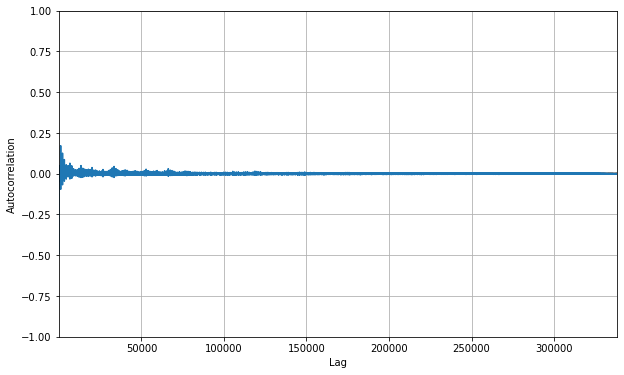

In [60]:
pd.plotting.autocorrelation_plot(data[1:]);

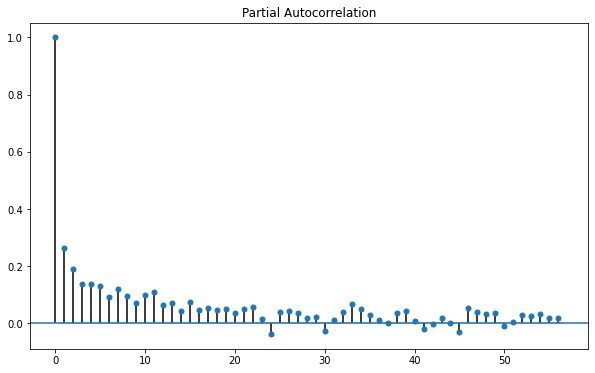

In [35]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(df_train_2013['Sales']);

## Partial Autocorrelarion after removing Trend

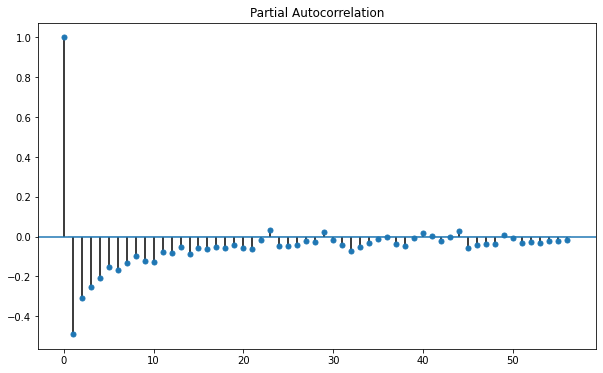

In [20]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data[1:]);

In [21]:
def corr_matrix(df):
    #correlation_matrix = df.drop(['volume'], axis=1)
    correlation_matrix = df.corr()
    print(correlation_matrix)
    
    fig, ax = plt.subplots(figsize=(13,10))

    sns.heatmap(correlation_matrix,
                annot=True,
                fmt='.2f',
                #cmap='YlGnBu',
                ax=ax);
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14);

                                 Store  DayOfWeek     Sales  Customers  \
Store                         1.000000   0.000277  0.011597   0.035202   
DayOfWeek                     0.000277   1.000000 -0.167917  -0.094879   
Sales                         0.011597  -0.167917  1.000000   0.834395   
Customers                     0.035202  -0.094879  0.834395   1.000000   
Promo                        -0.000079  -0.274502  0.351640   0.179621   
SchoolHoliday                -0.000684  -0.146841  0.020458   0.016137   
CompetitionDistance          -0.027156   0.005696 -0.039677  -0.147762   
Promo2                        0.006848  -0.004314 -0.133964  -0.204205   
Until_Holiday                 0.000255   0.008752 -0.065714  -0.047961   
Since_Holiday                 0.000196  -0.053194  0.019344   0.003775   
Year                          0.000039  -0.002197 -0.000592   0.008329   
Month                        -0.000221  -0.015321  0.086511   0.050627   
Quarter                      -0.000109

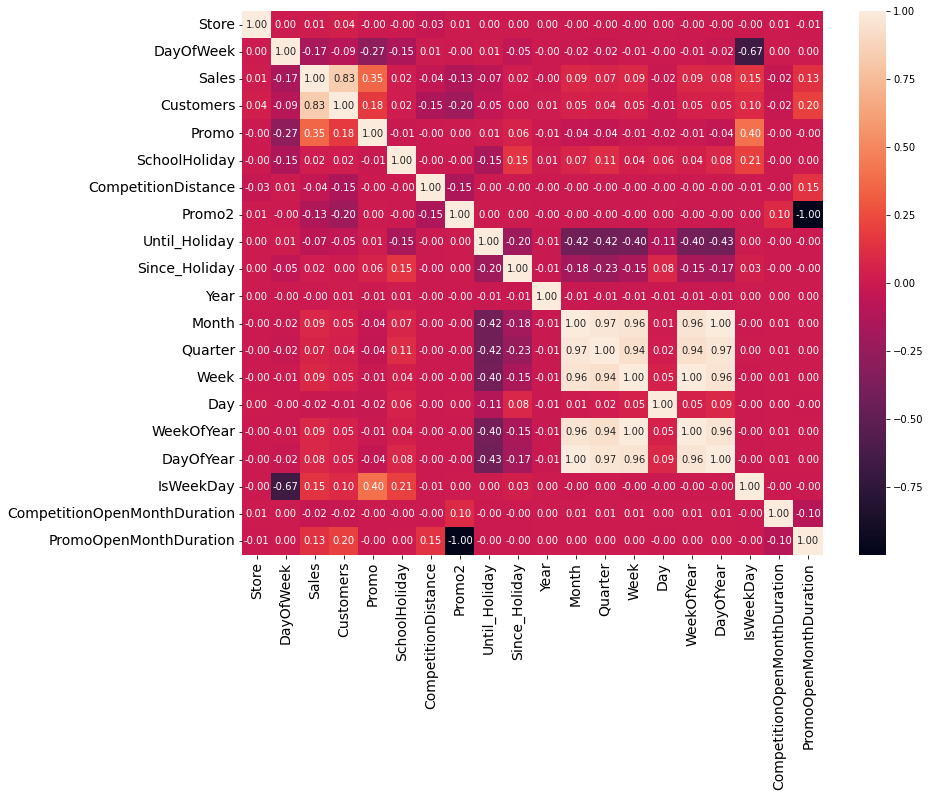

In [59]:
corr_matrix(
df_train_2013[df_train_2013.columns[df_train_2013.dtypes!='object']]
    
)

## Stationary Check

In [62]:
X = df_train['Sales'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=6773.694538, mean2=7137.334044
variance1=9468599.538255, variance2=9737558.356974


In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
X = df_train.loc['2013-01-01':'2013-01-07']['Sales'].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.619429
p-value: 0.005400
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


## since the p-value << 0.05 we can conclude that the data is stationary